# Problem Set 3 CS129.18

The following problem set will revolve around the Enron Emails dataset.
The dataset `data/enron-data/` directory has 6 files. The objective is to build a classifier for whether email is spam or not.


## Requirements


>Spam or Ham?

Using the lessons on Naive Bayes and TF-IDF, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

**Using Enron 1 and 2**

1. How many Spam Emails are there? 

2. Structure the email data from the 2 directories into 1 dataframe with columns: Status, Subject, Body 

3. Build a Naive Bayes classifier to classify whether emails are spam or not. 

4. What is the longest ham email? 

5. What is the accuracy of your model?

6. Include the Subject in the analysis of the emails, does the accuracy/performance of the model increase? 



-----


Bonus : Answer questions 1-6 using Enron 1,2, and 3.

----

In [1]:
%matplotlib inline

import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import re
import random

In [2]:
rootdir = "data/enron-data/enron1"
# Loop through all the directories, sub directories and files in the above folder, and print them.
for directories, subdirs, files in os.walk(rootdir):
    print(directories, subdirs, len(files))

data/enron-data/enron1 ['ham', 'spam', 'test_ham', 'test_spam'] 2
data/enron-data/enron1\ham [] 3672
data/enron-data/enron1\spam [] 1499
data/enron-data/enron1\test_ham [] 2
data/enron-data/enron1\test_spam [] 2


<div class="alert alert-block alert-info">
<b>Enron1</b>
</div>

# Process of making a dataframe from ham and spam folder

### Append the list of emails in ham_list & spam_list & list all the ham status in ham_status and spam status in spam_status

In [20]:
ham_list = []
ham_status = []
ham_subject = []
ham_body = []

spam_list = []
spam_status = []
spam_subject = []
spam_body = []


for directories, subdirs, files in os.walk(rootdir):
    if (os.path.split(directories)[1]  == 'ham'):
        for filename in files:      
            ham_status.append(filename.split(".")[3])
            
    if (os.path.split(directories)[1]  == 'ham'):
        for filename in files:      
            with open(os.path.join(directories, filename), encoding="latin-1") as f:
                data = f.read()
                ham_list.append(data)

    if (os.path.split(directories)[1]  == 'spam'):
        for filename in files:      
            spam_status.append(filename.split(".")[3])
            
    if (os.path.split(directories)[1]  == 'spam'):
        for filename in files:      
            with open(os.path.join(directories, filename), encoding="latin-1") as f:
                data = f.read()
                spam_list.append(data)

### Append on ham_subject_list all the list of subject

Get the "Subject" since every text file starts with the capital Subject

In [21]:
ham_subject_list = []
spam_subject_list = []

for texts in ham_list:
    new_list = texts.split('\n')
    for list in new_list:
        if list.startswith('Subject'):
            ham_subject_list.append(list)

for texts in spam_list:
    new_list = texts.split('\n')
    for list in new_list:
        if list.startswith('Subject'):
            spam_subject_list.append(list)
            
# ham_subject_list

### Append on ham_subject the subjects 

In [22]:
for subjects in ham_subject_list:
    ham_subject.append(subjects.split(": ")[-1])

for subjects in spam_subject_list:
    spam_subject.append(subjects.split(": ")[-1])

### Use regex to match unwanted characters and retain only the messages

In [23]:
for body in ham_list:
    text = re.sub(r'Subject:.*|Subject :.*|subject:.*|subject :.*|from :.*|to :.*\n.*\n.*|cc :.*\n.*|- - - -.*\n.*\n.*\n.*\n.*|\" [a-z].*|\d{2} / \d{2} / \d{2}.*|\| - - -.*|\| \| \| \|.*|\| \d{1,2} , \d{1,3}.*|\| [a-zA-Z]+ / d \| [a-zA-Z].*', "", body)
    text2 = text.replace('\n', ' ')
    ham_body.append(text2)

for body in spam_list:
    text = re.sub(r'Subject:.*|Subject :.*|subject:.*|subject :.*|from :.*|to :.*\n.*\n.*|cc :.*\n.*|- - - -.*\n.*\n.*\n.*\n.*|\" [a-z].*|\d{2} / \d{2} / \d{2}.*|\| - - -.*|\| \| \| \|.*|\| \d{1,2} , \d{1,3}.*|\| [a-zA-Z]+ / d \| [a-zA-Z].*', "", body)
    text2 = text.replace('\n', ' ')
    spam_body.append(text2)

### Extend the lists of ham to add the lists of spam

In [24]:
ham_status.extend(spam_status)
ham_subject.extend(spam_subject)
ham_body.extend(spam_body)

### Make a dictionary for the Status, Subject, and Body

In [25]:
df_enron1 = {'Status': ham_status,
             'Subject': ham_subject,
             'Body': ham_body
}

### Finally, make a dataframe from the dictionary

In [26]:
df_enron1 = pd.DataFrame(df_enron1)
df_enron1

,Status,Subject,Body
0,ham,christmas tree farm pictures,
1,ham,"vastar resources , inc .","gary , production from the high island larger..."
2,ham,calpine daily gas nomination,- calpine daily gas nomination 1 . doc
3,ham,issue,fyi - see note below - already done . stella ...
4,ham,meter 7268 nov allocation,fyi . lauri . . i have put this on strangas...
...,...,...,...
5166,spam,our pro - forma invoice attached,"divide cover most gave . trip , until energy ..."
5167,spam,str _ rndlen ( 2 - 4 ) } { extra _ time _ 4 } ...,{ bodyhtml }
5168,spam,check me out !,"61 bb hey derm bbbbb check out paris , and ma..."
5169,spam,hot jobs,global marketing specialties po box 300 east ...


-----


## 1.) How many Spam Emails are there? 
>Enron1

----

In [27]:
enron_1_spam = df_enron1.Status.value_counts()['spam']
print(f'Spam Emails in Enron1: {enron_1_spam}')

Spam Emails in Enron1: 1499


-----


## 2.) Structure the email data from the 2 directories into 1 dataframe with columns: Status, Subject, Body 
>Enron1

----

 <span style="font-family: Arial; font-size:1.4em;color:blue;"> Delete the rows with empty values of Body </p>

In [28]:
df_enron1 = df_enron1[df_enron1['Body'] != ' ']
df_enron1

,Status,Subject,Body
1,ham,"vastar resources , inc .","gary , production from the high island larger..."
2,ham,calpine daily gas nomination,- calpine daily gas nomination 1 . doc
3,ham,issue,fyi - see note below - already done . stella ...
4,ham,meter 7268 nov allocation,fyi . lauri . . i have put this on strangas...
5,ham,mcmullen gas for 11 / 99,"jackie , since the inlet to 3 river plant is ..."
...,...,...,...
5166,spam,our pro - forma invoice attached,"divide cover most gave . trip , until energy ..."
5167,spam,str _ rndlen ( 2 - 4 ) } { extra _ time _ 4 } ...,{ bodyhtml }
5168,spam,check me out !,"61 bb hey derm bbbbb check out paris , and ma..."
5169,spam,hot jobs,global marketing specialties po box 300 east ...


ham     3660
spam    1411
Name: Status, dtype: int64


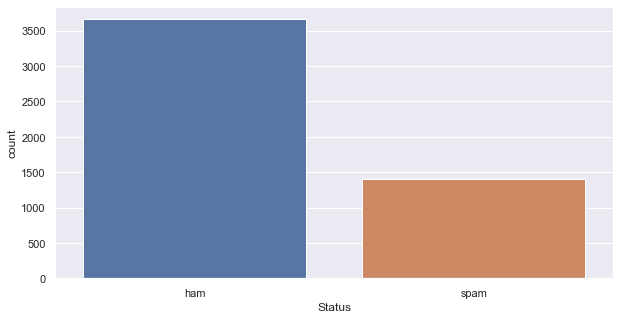

In [29]:
sns.set(rc={'figure.figsize':(10,5)})
ax=sns.countplot(x='Status', data=df_enron1)
ax.set_xticklabels(ax.get_xticklabels())

print(df_enron1.Status.value_counts().head())

-----


## 3.) Build a Naive Bayes classifier to classify whether emails are spam or not. 
>Enron1

----

 <span style="font-family: Arial; font-size:1.4em;color:blue;"> Using only the Body </p>

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(df_enron1['Body'], df_enron1['Status'], test_size=0.3, random_state=42)

In [31]:
# Vectorizer
tf = TfidfVectorizer(stop_words='english')

In [32]:
tf_X_train = tf.fit_transform(X_train)

In [33]:
G_classifier = GaussianNB()
G_classifier.fit(tf_X_train.toarray(), y_train)

GaussianNB()

-----


## 4.) What is the longest ham email? 
>Enron1

----

In [34]:
# Make the df_enron1 dataframe
df_enron1 = {'Status': ham_status,
             'Subject': ham_subject,
             'Body': ham_body
}
df_enron1 = pd.DataFrame(df_enron1)


# Return the length of the body for ham status
def length(column):
    status = column[0]
    body = column[2]
    if status == 'ham':
        return len(body)
    return body

df_enron1['Body'] = df_enron1.apply(length, axis=1)


# Make the ham dataframe containing only the ham status
ham = df_enron1[df_enron1['Status'] == 'ham']


# Get the max length of the body
max_len_body = ham.Body.max()


# Get the index of the longest body
print(ham[ham['Body'] == max_len_body])

print('='*160)

# Make the df_enron1 dataframe again and find the index with longest ham email
df_enron1 = {'Status': ham_status,
             'Subject': ham_subject,
             'Body': ham_body
}
df_enron1 = pd.DataFrame(df_enron1)
df_enron1.iloc[3488].Body

     Status                       Subject   Body
3488    ham  " red , white and blue out "  31404


"  ' pjadell @ yahoo . com ' ; ' bob @ cybersitebuilders . com ' ; ' worml 998 @ hotmail . com ' ; ' janie . beth @ prodigy . net ' ; ' gakin @ mccarthy . com ' ; ' vja @ flash . net ' ; ' locke . alder @ gte . net ' ; ' calexaol @ 7 - 11 . com ' ; ' erika @ publish . no . irs . gov ' ; ' ali @ buz . net ' ; ' brada @ ticnet . com ' ; ' svallen @ aol . com ' ; ' jand 30 @ aol . com ' ; ' allan @ stratsolgroup . com ' ; ' chuck _ anderson @ oxy . com ' ; ' mdqsga 96 @ aol . com ' ; ' brian _ anhalt @ bigfoot . com ' ; ' aranda @ nbstx . com ' ; ' aggiemom @ archer . cx ' ; ' jard @ nortelnetworks . com ' ; ' abarch @ airmail . net ' ; ' narguello @ yahoo . com ' ; ' jarmstrong @ tqtx . com ' ; ' mikie @ aggie . zzn . com ' ; ' ag 85 @ home . com ' ; ' kmarnold @ home . com ' ; ' hollya @ cyber - designs . com ' ; ' hughashburn @ netscape . net ' ; ' bob @ cybersitebuilders . com ' ; ' olinatkinson @ dellnet . com ' ; ' papaayres @ aol . com ' ; ' abackof 68 @ aol . com ' ; ' badgett @ t

-----


## 5.) What is the accuracy of your model? 
>Enron1

----

 <span style="font-family: Arial; font-size:1.4em;color:blue;"> Using 10-fold cross-validation </p>

In [35]:
tf_X_test = tf.transform(X_test)

scores = cross_val_score(G_classifier, tf_X_test.toarray(), y_test, cv=10)
acc = scores.mean()
print(tf_X_test.shape)
print("Accuracy: %0.2f percent" % (acc *100))

(1522, 38972)
Accuracy: 92.83 percent


In [36]:
y_test = pd.DataFrame(y_test)

df = pd.DataFrame(X_test).merge(y_test, left_index=True, right_index=True)
df = df.mask(df == 0, df.max(axis=1), axis=0) # making the index from 1 to end of row but it's not working

df['PRED'] = G_classifier.predict(tf_X_test.toarray())

In [37]:
df

,Body,Status,PRED
1733,"currently , prior month deals are inactivated...",ham,ham
3059,"daren - per janet , the price of $ 5 . 235 + ...",ham,ham
34,i wanted to update you on those phillips deal...,ham,ham
2175,teco tap 110 . 000 / hpl iferc ; 12 . 500 / e...,ham,ham
1680,deal # 231757 purchase the deal in sitara ind...,ham,ham
...,...,...,...
4320,googlecash gives you all the tools you need t...,spam,spam
4338,tired of paying high tobacco taxes ? we guara...,spam,spam
357,"please hold thursday , march 9 th 11 : 30 - 5...",ham,ham
2764,daren - was there a deal for 5 . 000 at cp & ...,ham,ham


 <span style="font-family: Arial; font-size:1.4em;color:blue;"> Model is pretty good </p>

              precision    recall  f1-score   support

         ham       0.96      0.96      0.96      1090
        spam       0.89      0.89      0.89       432

    accuracy                           0.94      1522
   macro avg       0.92      0.93      0.92      1522
weighted avg       0.94      0.94      0.94      1522



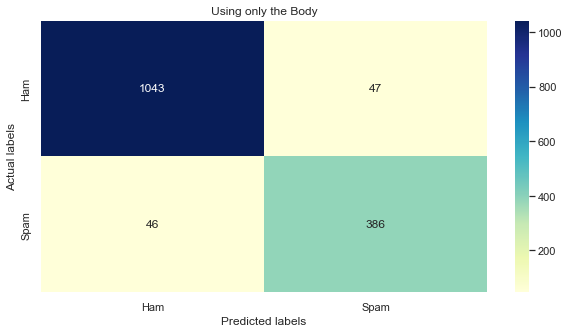

In [42]:
from sklearn import metrics
from sklearn.metrics import classification_report

cm = metrics.confusion_matrix(y_test, G_classifier.predict(tf_X_test.toarray()))

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="YlGnBu");  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Using only the Body'); 
ax.xaxis.set_ticklabels(['Ham', 'Spam']); ax.yaxis.set_ticklabels(['Ham', 'Spam']);

print(classification_report(y_test, G_classifier.predict(tf_X_test.toarray())))

 <span style="font-family: Arial; font-size:1.4em;color:blue;"> Let's try this out! </p>

In [43]:
examples = ['Free Viagra now!!!', 'Hi Bob, how about a game of golf tomorrow?']
example_counts = tf.transform(examples)
predictions = G_classifier.predict(example_counts.toarray())
predictions

array(['spam', 'ham'], dtype='<U4')

-----


## 6.) Include the Subject in the analysis of the emails, does the accuracy/performance of the model increase? 
>Enron1

----

In [44]:
df_enron1 = df_enron1[df_enron1['Body'] != ' ']
df_enron1['Subject & Body'] = df_enron1['Subject'].map(str) + df_enron1['Body'].map(str)

X_train, X_test, y_train, y_test = train_test_split(df_enron1['Subject & Body'], df_enron1['Status'], test_size=0.3, random_state=42)

In [45]:
# Vectorizer
tf = TfidfVectorizer(stop_words='english')

tf_X_train = tf.fit_transform(X_train)

G_classifier = GaussianNB()
G_classifier.fit(tf_X_train.toarray(), y_train)

GaussianNB()

In [46]:
tf_X_test = tf.transform(X_test)

scores = cross_val_score(G_classifier, tf_X_test.toarray(), y_test, cv=10)
acc = scores.mean()
print(tf_X_test.shape)
print("Accuracy: %0.2f percent" % (acc *100))

(1522, 39630)
Accuracy: 94.15 percent


 <span style="font-family: Arial; font-size:1.4em;color:blue;"> The Accuracy increases by 1-2% higher </p>

 <span style="font-family: Arial; font-size:1.4em;color:blue;"> The precision for ham became higher by 1% </p>

 <span style="font-family: Arial; font-size:1.4em;color:blue;"> Though the precision of Spam didn't change as False Spam didn't have much change </p>

 <span style="font-family: Arial; font-size:1.4em;color:blue;"> In terms of the recall for Spam, it became higher by 4% since False Ham became lower </p>

              precision    recall  f1-score   support

         ham       0.97      0.96      0.96      1090
        spam       0.89      0.93      0.91       432

    accuracy                           0.95      1522
   macro avg       0.93      0.94      0.94      1522
weighted avg       0.95      0.95      0.95      1522



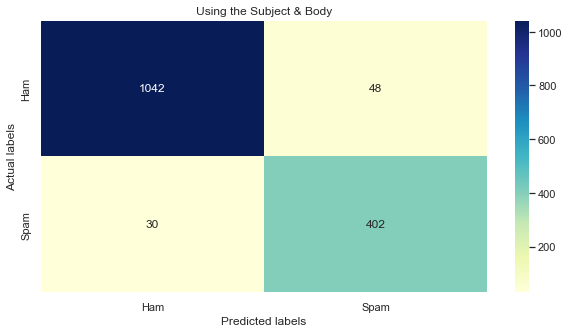

In [47]:
from sklearn import metrics
from sklearn.metrics import classification_report

cm = metrics.confusion_matrix(y_test, G_classifier.predict(tf_X_test.toarray()))

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="YlGnBu");  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Using the Subject & Body'); 
ax.xaxis.set_ticklabels(['Ham', 'Spam']); ax.yaxis.set_ticklabels(['Ham', 'Spam']);

print(classification_report(y_test, G_classifier.predict(tf_X_test.toarray())))

 <span style="font-family: Arial; font-size:1.4em;color:blue;"> Let's try this out! </p>

In [48]:
# Format: [Subject Body, Subject Body]

examples = ['October Deal Free Viagra now!!!', 'Gametime Hi Bob, how about a game of golf tomorrow?']
example_counts = tf.transform(examples)
predictions = G_classifier.predict(example_counts.toarray())
predictions

array(['spam', 'ham'], dtype='<U4')

<div class="alert alert-block alert-danger">
<b>Enron2</b>
</div>

# For enron2 & enron3: Let's make a function that returns the dataframe of ham and spam folder

In [4]:
def get_list(rootdir, ham=True, spam=True):
    '''
    This function returns a tuple of ham list 
    and spam list by default.
    Set the other parameter to False to only 
    return the parameter that is True
    '''
    ham_list = []
    spam_list = []
    

    for directories, subdirs, files in os.walk(rootdir):
        if (os.path.split(directories)[1]  == 'ham'):
            for filename in files:      
                with open(os.path.join(directories, filename), encoding="latin-1") as f:
                    data = f.read()
                    ham_list.append(data)
    
        if (os.path.split(directories)[1]  == 'spam'):
            for filename in files:      
                with open(os.path.join(directories, filename), encoding="latin-1") as f:
                    data = f.read()
                    spam_list.append(data)
        
    if ham & spam:
        return ham_list, spam_list
    elif ham is True:
        return ham_list
    elif spam is True:
        return spam_list
        
    
def get_status(rootdir, ham=True, spam=True):
    '''
    This function returns a tuple of ham status 
    and spam status by default.
    Set the other parameter to False to only 
    return the parameter that is True
    '''
    ham_status = []
    spam_status = []
    
    for directories, subdirs, files in os.walk(rootdir):
        if (os.path.split(directories)[1]  == 'ham'):
            for filename in files:      
                ham_status.append(filename.split(".")[3])
        if (os.path.split(directories)[1]  == 'spam'):
            for filename in files:      
                spam_status.append(filename.split(".")[3])
                
    if ham & spam:
        return ham_status, spam_status
    elif ham is True:
        return ham_status
    elif spam is True:
        return spam_status


def get_subject_list(rootdir, ham=True, spam=True):
    '''
    This function returns a tuple of ham &
    spam subjects by default including the word
    "Subject:"
    Set the other parameter to False to only 
    return the parameter that is True
    '''
    ham_subject_list = []
    spam_subject_list = []

    for texts in get_list(rootdir, True, False):
        new_list = texts.split('\n')
        for list in new_list:
            if list.startswith('Subject'):
                ham_subject_list.append(list)

    for texts in get_list(rootdir, False, True):
        new_list = texts.split('\n')
        for list in new_list:
            if list.startswith('Subject'):
                spam_subject_list.append(list)
    
    if ham & spam:
        return ham_subject_list, spam_subject_list
    elif ham is True:
        return ham_subject_list
    elif spam is True:
        return spam_subject_list
    

def get_subject(rootdir, ham=True, spam=True):
    '''
    This function only returns a tuple of list of messages 
    of ham & spam subjects by default excluding 
    the word "Subject:"
    Set the other parameter to False to only 
    return the parameter that is True
    '''
    ham_subject = []
    spam_subject = []
    
    for subjects in get_subject_list(rootdir, True, False):
        ham_subject.append(subjects.split(": ")[-1])

    for subjects in get_subject_list(rootdir, False, True):
        spam_subject.append(subjects.split(": ")[-1])

    if ham & spam:
        return ham_subject, spam_subject
    elif ham is True:
        return ham_subject
    elif spam is True:
        return spam_subject

    
    
def get_body(rootdir, ham=True, spam=True):
    '''
    This function returns a tuple of body or the 
    email message of ham and spam by default.
    Set the other parameter to False to only 
    return the parameter that is True
    '''
    ham_body = []
    spam_body = []
    
    for body in get_list(rootdir, True, False):
        text = re.sub(r'Subject:.*|Subject :.*|subject:.*|subject :.*|from :.*|to :.*\n.*\n.*|cc :.*\n.*|- - - -.*\n.*\n.*\n.*\n.*|\" [a-z].*|\d{2} / \d{2} / \d{2}.*|\| - - -.*|\| \| \| \|.*|\| \d{1,2} , \d{1,3}.*|\| [a-zA-Z]+ / d \| [a-zA-Z].*', "", body)
        text2 = text.replace('\n', ' ')
        ham_body.append(text2)

    for body in get_list(rootdir, False, True):
        text = re.sub(r'Subject:.*|Subject :.*|subject:.*|subject :.*|from :.*|to :.*\n.*\n.*|cc :.*\n.*|- - - -.*\n.*\n.*\n.*\n.*|\" [a-z].*|\d{2} / \d{2} / \d{2}.*|\| - - -.*|\| \| \| \|.*|\| \d{1,2} , \d{1,3}.*|\| [a-zA-Z]+ / d \| [a-zA-Z].*', "", body)
        text2 = text.replace('\n', ' ')
        spam_body.append(text2)
    
    if ham & spam:
        return ham_body, spam_body
    elif ham is True:
        return ham_body
    elif spam is True:
        return spam_body
    

def main(rootdir):
    '''
    This function structures the email data from the 
    2 directories into 1 dataframe 
    with columns: Status, Subject, Body
    '''
    ham_status, spam_status = get_status(rootdir)
    ham_status.extend(spam_status)
    
    ham_subject, spam_subject = get_subject(rootdir)
    ham_subject.extend(spam_subject)
    
    ham_body, spam_body = get_body(rootdir)
    ham_body.extend(spam_body)
    
    df = pd.DataFrame({'Status': ham_status,
             'Subject': ham_subject,
             'Body': ham_body})
    
    return df


if __name__ == '__main__':
    main(rootdir)

In [1187]:
df_enron2 = main('data/enron-data/enron2')

In [1188]:
df_enron2

,Status,Subject,Body
0,ham,rankings,thank you .
1,ham,visit to enron,"vince , dec . 29 at 9 : 00 will be fine . i h..."
2,ham,research group move to the 19 th floor,hello all : in case any of you feel energetic...
3,ham,christmas baskets,the christmas baskets have been ordered . we ...
4,ham,japan candidate,"vince , i spoke with whalley at the sa offsit..."
...,...,...,...
5850,spam,3 . 55 %,ha http : / / voj 2 hcdc . rote . espoeiur . ...
5851,spam,"localized software , all languages available .","hello , we would like to offer localized soft..."
5852,spam,instant branded software download,software sales http : / / francois . jetlow ....
5853,spam,"localized software , all languages available .","hello , we would like to offer localized soft..."


-----


## 1.) How many Spam Emails are there? 
>Enron2

----

In [1190]:
enron_2_spam = df_enron2.Status.value_counts()['spam']
print(f'Spam Emails in Enron2: {enron_2_spam}')

Spam Emails in Enron2: 1494


-----


## 2.) Structure the email data from the 2 directories into 1 dataframe with columns: Status, Subject, Body 
>Enron2

----

 <span style="font-family: Arial; font-size:1.4em;color:red;"> Delete the rows with empty values of Body </p>

In [1197]:
df_enron2 = df_enron2[df_enron2['Body'] != ' ']
df_enron2

,Status,Subject,Body
0,ham,rankings,thank you .
1,ham,visit to enron,"vince , dec . 29 at 9 : 00 will be fine . i h..."
2,ham,research group move to the 19 th floor,hello all : in case any of you feel energetic...
3,ham,christmas baskets,the christmas baskets have been ordered . we ...
4,ham,japan candidate,"vince , i spoke with whalley at the sa offsit..."
...,...,...,...
5850,spam,3 . 55 %,ha http : / / voj 2 hcdc . rote . espoeiur . ...
5851,spam,"localized software , all languages available .","hello , we would like to offer localized soft..."
5852,spam,instant branded software download,software sales http : / / francois . jetlow ....
5853,spam,"localized software , all languages available .","hello , we would like to offer localized soft..."


ham     4358
spam    1494
Name: Status, dtype: int64


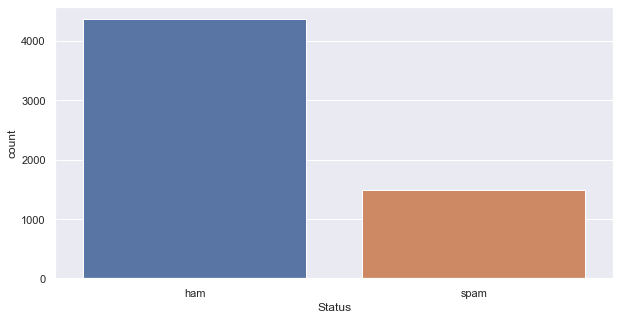

In [1199]:
sns.set(rc={'figure.figsize':(10,5)})
ax=sns.countplot(x='Status', data=df_enron2)
ax.set_xticklabels(ax.get_xticklabels())

print(df_enron2.Status.value_counts().head())

-----


## 3.) Build a Naive Bayes classifier to classify whether emails are spam or not. 
>Enron2

----

 <span style="font-family: Arial; font-size:1.4em;color:red;"> Using only the Body </p>

In [1202]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(df_enron2['Body'], df_enron2['Status'], test_size=0.3, random_state=42)

In [1203]:
# Vectorizer
tf = TfidfVectorizer(stop_words='english')

In [1204]:
tf_X_train = tf.fit_transform(X_train)

In [1205]:
G_classifier = GaussianNB()
G_classifier.fit(tf_X_train.toarray(), y_train)

GaussianNB()

-----


## 4.) What is the longest ham email? 
>Enron2

----

In [1214]:
# Make the df_enron2 dataframe
df_enron2 = main('data/enron-data/enron2')


# Return the length of the body for ham status
def length(column):
    status = column[0]
    body = column[2]
    if status == 'ham':
        return len(body)
    return body

df_enron2['Body'] = df_enron2.apply(length, axis=1)


# Make the ham dataframe containing only the ham status
ham = df_enron2[df_enron2['Status'] == 'ham']


# Get the max length of the body
max_len_body = ham.Body.max()


# Get the index of the longest body
print(ham[ham['Body'] == max_len_body])

print('='*160)

# Make the df_enron1 dataframe again and find the index with longest ham email
df_enron2 = main('data/enron-data/enron2')

df_enron2 = pd.DataFrame(df_enron2)
df_enron2.iloc[4099].Body

     Status                                            Subject   Body
4099    ham  from the enron india newsdesk - april 27 th ne...  41275


' fyi news articles from indian press .   friday apr 27 2001 , http : / / www . economictimes . com / today / cmo 3 . htm dpc board empowers md to cancel mseb contract friday apr 27 2001 , http : / / www . economictimes . com / today / 27 compl 1 . htm mseb pays rs 134 cr under \' protest \' to dpc friday , april 27 , 001 , enron india md authorised to terminate ppa friday , april 27 , 2001 , http : / / www . financialexpress . com / fe 20010427 / topl . html foreign lenders slam brakes on disbursements to dpc , sanjay jog & raghu mohan global banks comfortable with enron pull - out friday , april 27 , 2001 , http : / / www . indian - express . com / ie 20010427 / nat 23 . html enron : dabhol chief gets powers to end deal with the mseb friday , april 27 , 2001 , http : / / www . the - hindu . com / stories / 0227000 d . htm offer of renegotiation \' too late \' : enron , by mahesh vijapurkar friday , 27 april 2001 , http : / / www . timesofindia . com / today / 27 home 2 . htm enron re

-----


## 5.) What is the accuracy of your model? 
>Enron2

----

 <span style="font-family: Arial; font-size:1.4em;color:red;"> Using 10-fold cross-validation </p>

In [1221]:
tf_X_test = tf.transform(X_test)

scores = cross_val_score(G_classifier, tf_X_test.toarray(), y_test, cv=10)
acc = scores.mean()
print(tf_X_test.shape)
print("Accuracy: %0.2f percent" % (acc *100))

(1756, 31591)
Accuracy: 92.82 percent


In [1222]:
y_test = pd.DataFrame(y_test)

df = pd.DataFrame(X_test).merge(y_test, left_index=True, right_index=True)
df = df.mask(df == 0, df.max(axis=1), axis=0)

df['PRED'] = G_classifier.predict(tf_X_test.toarray())

In [1223]:
df

,Body,Status,PRED
3289,"vince , i have made bold face edits to the at...",ham,ham
2879,strategy please ignor my previous mail regard...,ham,ham
2999,jennifer . n . stewart @ enron . com i don ' ...,ham,ham
23,"aidan , yes , this will work for us . vince ...",ham,ham
1076,note : you will receive this message each tim...,ham,ham
...,...,...,...
2379,"as a reminder , ena  , s policy regarding re...",ham,ham
1514,thanks for your message . a call sometimes be...,ham,ham
3835,"christie , great ! ! you think big . it also ...",ham,ham
4584,this is not spam . thanks for posting to our ...,spam,ham


 <span style="font-family: Arial; font-size:1.4em;color:red;"> Model is pretty wow good </p>

              precision    recall  f1-score   support

         ham       0.96      0.98      0.97      1321
        spam       0.94      0.88      0.91       435

    accuracy                           0.96      1756
   macro avg       0.95      0.93      0.94      1756
weighted avg       0.96      0.96      0.96      1756



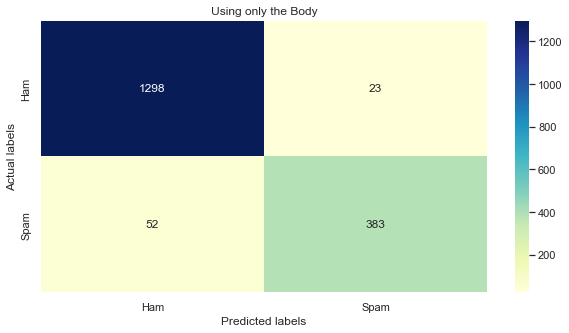

In [1224]:
from sklearn import metrics
from sklearn.metrics import classification_report

cm = metrics.confusion_matrix(y_test, G_classifier.predict(tf_X_test.toarray()))

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="YlGnBu");  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Using only the Body'); 
ax.xaxis.set_ticklabels(['Ham', 'Spam']); ax.yaxis.set_ticklabels(['Ham', 'Spam']);

print(classification_report(y_test, G_classifier.predict(tf_X_test.toarray())))

 <span style="font-family: Arial; font-size:1.4em;color:red;"> Let's try this out! </p>

In [1226]:
examples = ['Free Viagra now!!!', 'Hi Bob, how about a game of golf tomorrow?']
example_counts = tf.transform(examples)
predictions = G_classifier.predict(example_counts.toarray())
predictions

array(['spam', 'ham'], dtype='<U4')

-----


## 6.) Include the Subject in the analysis of the emails, does the accuracy/performance of the model increase? 
>Enron2

----

In [1234]:
df_enron2 = df_enron2[df_enron2['Body'] != ' ']
df_enron2['Subject & Body'] = df_enron2['Subject'].map(str) + df_enron2['Body'].map(str)

X_train, X_test, y_train, y_test = train_test_split(df_enron2['Subject & Body'], df_enron2['Status'], test_size=0.3, random_state=42)

In [1235]:
# Vectorizer
tf = TfidfVectorizer(stop_words='english')

tf_X_train = tf.fit_transform(X_train)

G_classifier = GaussianNB()
G_classifier.fit(tf_X_train.toarray(), y_train)

GaussianNB()

In [1236]:
tf_X_test = tf.transform(X_test)

scores = cross_val_score(G_classifier, tf_X_test.toarray(), y_test, cv=10)
acc = scores.mean()
print(tf_X_test.shape)
print("Accuracy: %0.2f percent" % (acc *100))

(1756, 32023)
Accuracy: 93.50 percent


 <span style="font-family: Arial; font-size:1.4em;color:red;"> Wow, so there's some significant increase in precision and recall of spam </p>

 <span style="font-family: Arial; font-size:1.4em;color:red;"> Also the precision and recall of ham increased </p>

 <span style="font-family: Arial; font-size:1.4em;color:red;"> As well as the accuracy of the model </p>

              precision    recall  f1-score   support

         ham       0.97      0.99      0.98      1321
        spam       0.96      0.90      0.93       435

    accuracy                           0.97      1756
   macro avg       0.96      0.94      0.95      1756
weighted avg       0.97      0.97      0.96      1756



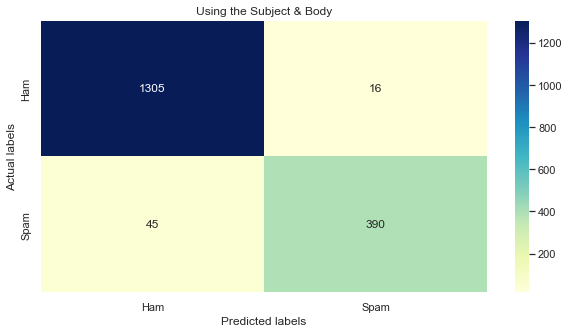

In [1237]:
from sklearn import metrics
from sklearn.metrics import classification_report

cm = metrics.confusion_matrix(y_test, G_classifier.predict(tf_X_test.toarray()))

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="YlGnBu");  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Using the Subject & Body'); 
ax.xaxis.set_ticklabels(['Ham', 'Spam']); ax.yaxis.set_ticklabels(['Ham', 'Spam']);

print(classification_report(y_test, G_classifier.predict(tf_X_test.toarray())))

 <span style="font-family: Arial; font-size:1.4em;color:red;"> Let's try this out! </p>

In [1239]:
# Format: [Subject Body, Subject Body]

examples = ['October Deal Free Viagra now!!!', 'Gametime Hi Bob, how about a game of golf tomorrow?']
example_counts = tf.transform(examples)
predictions = G_classifier.predict(example_counts.toarray())
predictions

array(['spam', 'ham'], dtype='<U4')

<div class="alert alert-block alert-success">
<b>Enron3</b>
</div>

In [49]:
df_enron3 = main('data/enron-data/enron3')

In [50]:
df_enron3

,Status,Subject,Body
0,ham,key hr issues going forward,a ) year end reviews - report needs generatin...
1,ham,congrats !,contratulations on the execution of the centr...
2,ham,key hr issues going forward,all is under control : a - we ' ve set up a ...
3,ham,epmi files protest of entergy transco,attached is our filing made yesterday protest...
4,ham,california power 2 / 8,please contact kristin walsh ( x 39510 ) or r...
...,...,...,...
5506,spam,need your vics ?,"brand name meds such as vics , vals , xanies ..."
5507,spam,hey ! tell your friends to hit me up,we offer instant download ! you will no need ...
5508,spam,= ? iso - 8859 - 1 ? q ? v = colllum _ clal = ...,"hello , welcome to gigapharm onlinee shop . p..."
5509,spam,"dear sir , i am interested in it",hi : ) do you need some softwares ? i can giv...


-----


## 1.) How many Spam Emails are there? 
>Enron3

----

In [51]:
enron_3_spam = df_enron3.Status.value_counts()['spam']
print(f'Spam Emails in Enron3: {enron_3_spam}')

Spam Emails in Enron3: 1499


-----


## 2.) Structure the email data from the 2 directories into 1 dataframe with columns: Status, Subject, Body 
>Enron3

----

 <span style="font-family: Arial; font-size:1.4em;color:green;"> Delete the rows with empty values of Body </p>

In [52]:
df_enron3 = df_enron3[df_enron3['Body'] != ' ']
df_enron3

,Status,Subject,Body
0,ham,key hr issues going forward,a ) year end reviews - report needs generatin...
1,ham,congrats !,contratulations on the execution of the centr...
2,ham,key hr issues going forward,all is under control : a - we ' ve set up a ...
3,ham,epmi files protest of entergy transco,attached is our filing made yesterday protest...
4,ham,california power 2 / 8,please contact kristin walsh ( x 39510 ) or r...
...,...,...,...
5506,spam,need your vics ?,"brand name meds such as vics , vals , xanies ..."
5507,spam,hey ! tell your friends to hit me up,we offer instant download ! you will no need ...
5508,spam,= ? iso - 8859 - 1 ? q ? v = colllum _ clal = ...,"hello , welcome to gigapharm onlinee shop . p..."
5509,spam,"dear sir , i am interested in it",hi : ) do you need some softwares ? i can giv...


ham     3969
spam    1499
Name: Status, dtype: int64


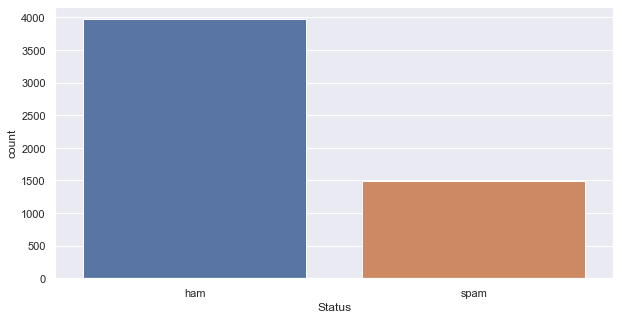

In [53]:
sns.set(rc={'figure.figsize':(10,5)})
ax=sns.countplot(x='Status', data=df_enron3)
ax.set_xticklabels(ax.get_xticklabels())

print(df_enron3.Status.value_counts().head())

-----


## 3.) Build a Naive Bayes classifier to classify whether emails are spam or not. 
>Enron3

----

 <span style="font-family: Arial; font-size:1.4em;color:green;"> Using only the Body </p>

In [54]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(df_enron3['Body'], df_enron3['Status'], test_size=0.3, random_state=42)

In [55]:
# Vectorizer
tf = TfidfVectorizer(stop_words='english')

In [56]:
tf_X_train = tf.fit_transform(X_train)

In [57]:
G_classifier = GaussianNB()
G_classifier.fit(tf_X_train.toarray(), y_train)

GaussianNB()

-----


## 4.) What is the longest ham email? 
>Enron3

----

In [58]:
# Make the df_enron2 dataframe
df_enron3 = main('data/enron-data/enron3')


# Return the length of the body for ham status
def length(column):
    status = column[0]
    body = column[2]
    if status == 'ham':
        return len(body)
    return body

df_enron3['Body'] = df_enron3.apply(length, axis=1)


# Make the ham dataframe containing only the ham status
ham = df_enron3[df_enron3['Status'] == 'ham']


# Get the max length of the body
max_len_body = ham.Body.max()


# Get the index of the longest body
print(ham[ham['Body'] == max_len_body])

print('='*160)

# Make the df_enron1 dataframe again and find the index with longest ham email
df_enron3 = main('data/enron-data/enron3')

df_enron3 = pd.DataFrame(df_enron3)
df_enron3.iloc[3225].Body

     Status         Subject    Body
3225    ham  enron mentions  197505


" enron : a wake - up call the wall street journal ,  fall of a power giant : dynegy hits back at enron with lawsuit - - - claim is that failed merger entitles concern to get northern natural gas the wall street journal ,  enron secures $ 1 . 5 billion in new financing - - - j . p . morgan , citigroup pact is first step ; now , lifeline is sought for trading unit the wall street journal ,  fall of a power giant : burst of chapter 11 filings marks big year for the bankruptcy bar the wall street journal ,  fall of a power giant : now is the time for creditors to vie against each other the wall street journal ,  auditor andersen is added to enron 401 ( k ) lawsuit the wall street journal ,  stadium jinx : what to call enron field ? ` enron folds , ' maybe - - - firms that put their names on arenas hit hard times ; former trans world dome the wall street journal ,  as kpn prepares to sell new shares , investors remain lukewarm toward dutch telecom firm the wall street journal ,  small - st

-----


## 5.) What is the accuracy of your model? 
>Enron3

----

 <span style="font-family: Arial; font-size:1.4em;color:green;"> Using 10-fold cross-validation </p>

In [59]:
tf_X_test = tf.transform(X_test)

scores = cross_val_score(G_classifier, tf_X_test.toarray(), y_test, cv=10)
acc = scores.mean()
print(tf_X_test.shape)
print("Accuracy: %0.2f percent" % (acc *100))

(1641, 41319)
Accuracy: 91.22 percent


In [60]:
y_test = pd.DataFrame(y_test)

df = pd.DataFrame(X_test).merge(y_test, left_index=True, right_index=True)
df = df.mask(df == 0, df.max(axis=1), axis=0)

df['PRED'] = G_classifier.predict(tf_X_test.toarray())

In [61]:
df

,Body,Status,PRED
4477,sac solutions le brinda la posibilidad de com...,spam,spam
3851,greg / louise - i would like your approval fo...,ham,ham
4080,"sí , aunque no lo creas , es diferente porque...",spam,spam
2458,enron replaces fastow as finance chief - - - ...,ham,ham
5067,"the extender - real product , real result the...",spam,spam
...,...,...,...
4621,"our art team creates a custom logo for you , ...",spam,spam
5012,"hello , vlsit our pharmacy - bymailshop and s...",spam,spam
4337,"asetar , ) ) 247 % - online doctorz ! up to 7...",spam,spam
5018,who can resist a 24 kt . white gold rolex wat...,spam,spam


 <span style="font-family: Arial; font-size:1.4em;color:green;"> Pretty decent model </p>

              precision    recall  f1-score   support

         ham       0.94      0.98      0.96      1191
        spam       0.95      0.84      0.89       450

    accuracy                           0.95      1641
   macro avg       0.95      0.91      0.93      1641
weighted avg       0.95      0.95      0.94      1641



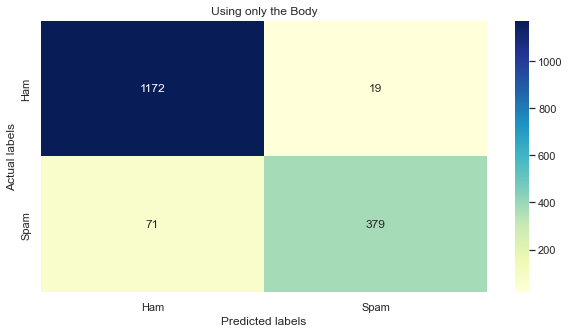

In [62]:
from sklearn import metrics
from sklearn.metrics import classification_report

cm = metrics.confusion_matrix(y_test, G_classifier.predict(tf_X_test.toarray()))

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="YlGnBu");  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Using only the Body'); 
ax.xaxis.set_ticklabels(['Ham', 'Spam']); ax.yaxis.set_ticklabels(['Ham', 'Spam']);

print(classification_report(y_test, G_classifier.predict(tf_X_test.toarray())))

 <span style="font-family: Arial; font-size:1.4em;color:green;"> Let's try this out! </p>

In [64]:
examples = ['Free Viagra now!!!', 'Hi Bob, how about a game of golf tomorrow?']
example_counts = tf.transform(examples)
predictions = G_classifier.predict(example_counts.toarray())
predictions

array(['spam', 'ham'], dtype='<U4')

-----


## 6.) Include the Subject in the analysis of the emails, does the accuracy/performance of the model increase? 
>Enron3

----

In [65]:
df_enron3 = df_enron3[df_enron3['Body'] != ' ']
df_enron3['Subject & Body'] = df_enron3['Subject'].map(str) + df_enron3['Body'].map(str)

X_train, X_test, y_train, y_test = train_test_split(df_enron3['Subject & Body'], df_enron3['Status'], test_size=0.3, random_state=42)

In [66]:
# Vectorizer
tf = TfidfVectorizer(stop_words='english')

tf_X_train = tf.fit_transform(X_train)

G_classifier = GaussianNB()
G_classifier.fit(tf_X_train.toarray(), y_train)

GaussianNB()

In [67]:
tf_X_test = tf.transform(X_test)

scores = cross_val_score(G_classifier, tf_X_test.toarray(), y_test, cv=10)
acc = scores.mean()
print(tf_X_test.shape)
print("Accuracy: %0.2f percent" % (acc *100))

(1641, 41908)
Accuracy: 92.20 percent


 <span style="font-family: Arial; font-size:1.4em;color:green;"> Not much of a change in precision on spam as well as the accuracy </p>

              precision    recall  f1-score   support

         ham       0.95      0.98      0.97      1191
        spam       0.95      0.87      0.91       450

    accuracy                           0.95      1641
   macro avg       0.95      0.93      0.94      1641
weighted avg       0.95      0.95      0.95      1641



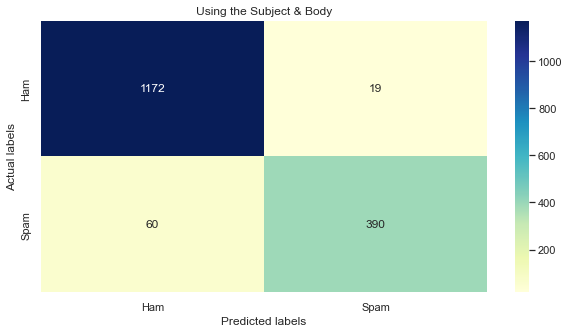

In [68]:
from sklearn import metrics
from sklearn.metrics import classification_report

cm = metrics.confusion_matrix(y_test, G_classifier.predict(tf_X_test.toarray()))

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="YlGnBu");  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Using the Subject & Body'); 
ax.xaxis.set_ticklabels(['Ham', 'Spam']); ax.yaxis.set_ticklabels(['Ham', 'Spam']);

print(classification_report(y_test, G_classifier.predict(tf_X_test.toarray())))

 <span style="font-family: Arial; font-size:1.4em;color:green;"> Let's try this out! </p>

In [72]:
# Format: [Subject Body, Subject Body]

examples = ['October Deal Free Viagra now!!!', 'Gametime Hi Bob, how about a game of golf tomorrow?']
example_counts = tf.transform(examples)
predictions = G_classifier.predict(example_counts.toarray())
predictions

array(['spam', 'ham'], dtype='<U4')